In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
#Read Excel file 
file = 'C:/Users/Asma/Desktop/Documents pdf/Sample_Data.xlsx'
df = pd.ExcelFile(file)
print(df.sheet_names)
Saatchi = df.parse('Data')
Saatchi.head()

['Data']


,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video)
0,India_Tamil_display 5,Puducherry,2020/02/03,47,32,0,0,0,0,0
1,India_Tamil_display 5,Tamil Nadu,2020/02/03,2601,1767,1,0,0,0,0
2,Indonesia_Arabic_display 1,"Banten,Indonesia",2020/02/03,189,128,0,0,0,0,0
3,Indonesia_Arabic_display 1,Central Java,2020/02/03,169,115,0,0,0,0,0
4,Indonesia_Arabic_display 1,East Java,2020/02/03,230,156,0,0,0,0,0


In [4]:
#Split Country and language 
Saatchi[['Country', 'Language']] = Saatchi['Line Item'].str.extract(r'^_*([^_]+)_(.+)')
Saatchi.head()

,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Country,Language
0,India_Tamil_display 5,Puducherry,2020/02/03,47,32,0,0,0,0,0,India,Tamil_display 5
1,India_Tamil_display 5,Tamil Nadu,2020/02/03,2601,1767,1,0,0,0,0,India,Tamil_display 5
2,Indonesia_Arabic_display 1,"Banten,Indonesia",2020/02/03,189,128,0,0,0,0,0,Indonesia,Arabic_display 1
3,Indonesia_Arabic_display 1,Central Java,2020/02/03,169,115,0,0,0,0,0,Indonesia,Arabic_display 1
4,Indonesia_Arabic_display 1,East Java,2020/02/03,230,156,0,0,0,0,0,Indonesia,Arabic_display 1


In [5]:
#Replace Indonesia and Vitenam
Saatchi['Country'] = Saatchi['Country'].replace({'Indonesa':'Indonesia', 'Vietnamn':'Vietnam'})

In [8]:
#what language/country has the most and least impressions
#Highest impression
Saatchi[Saatchi.Impressions == Saatchi.Impressions.max()]

,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Country,Language
1321,SriLanka_Sinhala_display 5,"Western Province,Sri Lanka",2020/01/27,5051,3431,19,0,0,0,0,SriLanka,Sinhala_display 5


In [9]:
#Lowest Impression
Saatchi[Saatchi.Impressions == Saatchi.Impressions.min()]

,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Country,Language
67,Indonesia_Pashto_display 1,"Riau Islands,Indonesia",2020/02/03,1,1,0,0,0,0,0,Indonesia,Pashto_display 1
83,Indonesia_Somali_display 1,"Banten,Indonesia",2020/02/03,1,1,0,0,0,0,0,Indonesia,Somali_display 1
101,Indonesia_Sudanese Arabic_display 1,"South East Sulawesi,Indonesia",2020/02/03,1,1,0,0,0,0,0,Indonesia,Sudanese Arabic_display 1
165,SriLanka_Tamil_display 5,Unknown,2020/02/03,1,1,0,0,0,0,0,SriLanka,Tamil_display 5
174,Indonesia_Arabic_video 1,Central Java,2020/02/03,1,1,0,1,0,0,0,Indonesia,Arabic_video 1
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,_Srilanka_Tamil_Video_5,"North Western Province,Sri Lanka",2020/01/27,1,1,0,1,1,1,1,Srilanka,Tamil_Video_5
1539,_Srilanka_Tamil_Video_5,"Southern Province,Sri Lanka",2020/01/27,1,1,0,1,1,1,0,Srilanka,Tamil_Video_5
1543,_Srilanka_Tamil_Video_5,"Northern Province,Sri Lanka",2020/01/27,1,1,0,1,1,1,1,Srilanka,Tamil_Video_5
1545,_Srilanka_Tamil_Video_5,"North Western Province,Sri Lanka",2020/01/27,1,1,0,1,1,1,0,Srilanka,Tamil_Video_5


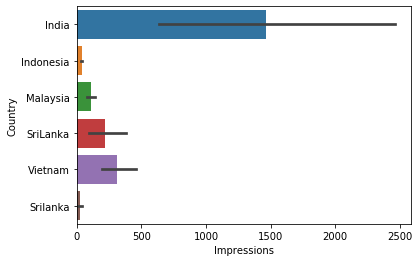

In [10]:
#Barchart to show country with highest and lowest impressions #India had the most impressions while Srilanka had lowest impressions
ax = sns.barplot(x="Impressions", y="Country", data=Saatchi)

In [37]:
#what region is performing the best in Indonesia from a click through perspective (clicks over impressions)
table = pd.pivot_table(Saatchi, index = ['Country' , 'Region'], values="Clicks" , aggfunc= 'sum')
result = table.sort_values(('Clicks'), ascending=False)
result.query('Country == ["Indonesia"]')
#South Sulawesi region has the most clicks in Indonesia 

Clicks
Country   Region                               
Indonesia South Sulawesi                     20
          East Java                          18
          Central Java                       14
          Jakarta                            10
          Riau                               10
          North Sumatra                       9
          North Sulawesi                      7
          West Java                           7
          Banten,Indonesia                    7
          East Nusa Tenggara,Indonesia        6
          West Kalimantan,Indonesia           6
          Riau Islands,Indonesia              3
          South East Sulawesi,Indonesia       0
          Unknown                             0
          East Kalimantan                     0
          Bantn,Indonesia                     0

In [18]:
#what region is performing the best in other countries from a Reach through perspective 
table = pd.pivot_table(Saatchi, index = ['Country' , 'Region'], values="Reach" , aggfunc= 'sum')
print(table)

                                            Reach
Country   Region                                 
India     Puducherry                          204
          Tamil Nadu                        11826
Indonesia Banten,Indonesia                   1367
          Bantn,Indonesia                      14
          Central Java                       3199
          East Java                          3936
          East Kalimantan                     539
          East Nusa Tenggara,Indonesia        504
          Jakarta                            7724
          North Sulawesi                      902
          North Sumatra                      1470
          Riau                                780
          Riau Islands,Indonesia              393
          South East Sulawesi,Indonesia        90
          South Sulawesi                     2325
          Unknown                               7
          West Java                          4658
          West Kalimantan,Indonesia           380


In [44]:
#Most of the impressions were in Tamil language 
table = pd.pivot_table(Saatchi, index = ['Language'], values="Impressions" , aggfunc= 'sum')
result = table.sort_values(('Impressions'), ascending=False)
print(result)

                           Impressions
Language                              
Tamil_display 5                  17418
Sinhala_display 5                14533
Arabic_display 1                 14508
Sinhala_display 1                14504
Tamil_display 1                  14504
Vietnamese_display 1             13578
Tamil__1                          3281
Burmese_display 1                 2940
Urdu_display 1                    2932
Bengali_display 1                 2907
Farsi_display 1                   2907
Pashto_display 1                  2898
Somali_display 1                  2895
K.Sorani_display 1                2887
Tamil_Video_1                     2881
Tamil_Video_5                     2269
Tamil__1                          1538
Sudanese Arabic_display 1         1465
Vietnamese_Video 1                1420
Sinhala_Video 5                   1367
Sinhala_Video 1                   1334
Tamil__1                           758
Sinhala_video 1                    582
Arabic_video 1           

In [6]:
# Videos in Vietnames are more likely to be watched (based on clicks)
table = pd.pivot_table(Saatchi, index = ['Language'], values="Clicks" , aggfunc= 'sum')
result = table.sort_values(('Clicks'), ascending=False)
print(result)

                           Clicks
Language                         
Vietnamese_display 1           74
Sinhala_display 5              49
Tamil_display 5                43
Tamil__1                       42
Tamil_Video_1                  36
Tamil_display 1                23
Tamil__1                       21
Sinhala_display 1              18
Sinhala_Video 1                11
Tamil_Video_5                  10
Arabic_display 1               10
Bengali_display 1               6
Farsi_display 1                 5
Tamil_Video_1                   4
Tamil__1                        3
Somali_display 1                3
Urdu_display 1                  2
K.Sorani_display 1              2
Pashto_display 1                2
Farsi_video 1                   1
Sinhala_Video 5                 1
Burmese_display 1               1
Vietnamese_Video 1              1
Sudanese Arabic_display 1       1
Urdu_video 1                    0
Arabic_video 1                  0
Sudanese Arabic_video 1         0
Sudanese Arabi

In [7]:
# Videos in Tamil language has the best Reach rate followed by Arabic Language
table = pd.pivot_table(Saatchi, index = ['Language'], values="Reach" , aggfunc= 'sum')
result = table.sort_values(('Reach'), ascending=False)
print(result)

                           Reach
Language                        
Tamil_display 5            11873
Arabic_display 1            9922
Sinhala_display 5           9891
Tamil_display 1             9888
Sinhala_display 1           9880
Vietnamese_display 1        9230
Tamil__1                    2265
Burmese_display 1           2002
Urdu_display 1              1993
Tamil_Video_1               1987
Bengali_display 1           1983
Farsi_display 1             1982
Pashto_display 1            1973
Somali_display 1            1969
K.Sorani_display 1          1964
Tamil_Video_5               1573
Tamil__1                    1064
Sudanese Arabic_display 1   1001
Vietnamese_Video 1           986
Sinhala_Video 5              933
Sinhala_Video 1              910
Tamil__1                     523
Sinhala_video 1              402
Arabic_video 1               291
Bengali_video 1              222
Urdu_video 1                 212
Farsi_video 1                211
Pashto_video 1               210
Burmese_vi

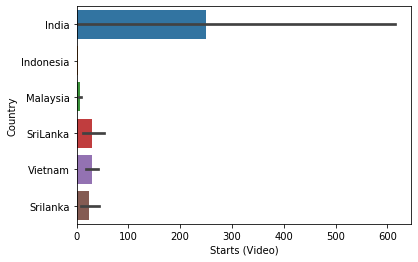

In [32]:
ax = sns.barplot(x="Starts (Video)", y="Country", data=Saatchi)

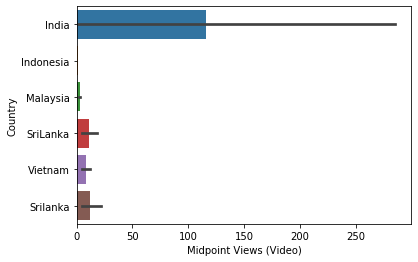

In [26]:
ax = sns.barplot(x="Midpoint Views (Video)", y="Country", data=Saatchi)

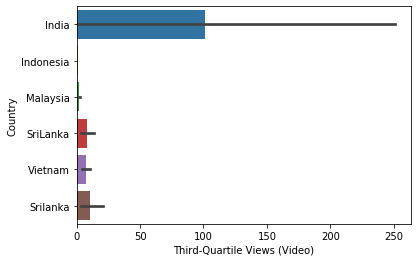

In [27]:
ax = sns.barplot(x="Third-Quartile Views (Video)", y="Country", data=Saatchi)

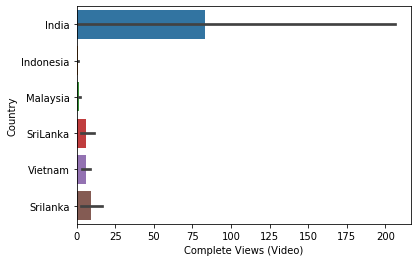

In [17]:
#rank countries by video views (choose your chart)
ax = sns.barplot(x="Complete Views (Video)", y="Country", data=Saatchi)

In [6]:
#Exclude unknown region rows
Saatchi[Saatchi.Region != 'Unknown']

,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Country,Language
0,India_Tamil_display 5,Puducherry,2020/02/03,47,32,0,0,0,0,0,India,Tamil_display 5
1,India_Tamil_display 5,Tamil Nadu,2020/02/03,2601,1767,1,0,0,0,0,India,Tamil_display 5
2,Indonesia_Arabic_display 1,"Banten,Indonesia",2020/02/03,189,128,0,0,0,0,0,Indonesia,Arabic_display 1
3,Indonesia_Arabic_display 1,Central Java,2020/02/03,169,115,0,0,0,0,0,Indonesia,Arabic_display 1
4,Indonesia_Arabic_display 1,East Java,2020/02/03,230,156,0,0,0,0,0,Indonesia,Arabic_display 1
...,...,...,...,...,...,...,...,...,...,...,...,...
1544,_Srilanka_Tamil_Video_5,"Southern Province,Sri Lanka",2020/01/27,3,2,1,3,2,2,1,Srilanka,Tamil_Video_5
1545,_Srilanka_Tamil_Video_5,"North Western Province,Sri Lanka",2020/01/27,1,1,0,1,1,1,0,Srilanka,Tamil_Video_5
1546,_Srilanka_Tamil_Video_5,"Southern Province,Sri Lanka",2020/01/27,3,2,0,3,2,1,1,Srilanka,Tamil_Video_5
1547,_Srilanka_Tamil_Video_5,"Western Province,Sri Lanka",2020/01/27,1,1,0,1,0,0,0,Srilanka,Tamil_Video_5


In [7]:
#visualise the impressions/reach/video views on a map
#Get unique regions out of Region column in a seperate dataframe to avoid timeout issue of geocode
df=pd.DataFrame(columns=["Unique_Region"])
df["Region"] = Saatchi["Region"].unique()

In [10]:
locator = Nominatim(user_agent= "myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
# 2- - create location column
df['location'] = df['Region'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [11]:
#Merge the two dataframes to append latitude and longitude 
df1 = pd.merge(Saatchi, df, on='Region', how='left')
df1.head()

,Line Item,Region,Week Commencing,Impressions,Reach,Clicks,Starts (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Country,Language,Unique_Region,location,point,latitude,longitude,altitude
0,India_Tamil_display 5,Puducherry,2020/02/03,47,32,0,0,0,0,0,India,Tamil_display 5,NaN,"(Puducherry, Puducherry Taluk, Puducherry dist...","(11.9340568, 79.8306447, 0.0)",11.934057,79.830645,0.0
1,India_Tamil_display 5,Tamil Nadu,2020/02/03,2601,1767,1,0,0,0,0,India,Tamil_display 5,NaN,"(Tamil Nadu, India, (10.9094334, 78.3665347))","(10.9094334, 78.3665347, 0.0)",10.909433,78.366535,0.0
2,Indonesia_Arabic_display 1,"Banten,Indonesia",2020/02/03,189,128,0,0,0,0,0,Indonesia,Arabic_display 1,NaN,"(Banten, Indonesia, (-6.47800285, 105.54102849...","(-6.47800285, 105.54102849016589, 0.0)",-6.478003,105.541028,0.0
3,Indonesia_Arabic_display 1,Central Java,2020/02/03,169,115,0,0,0,0,0,Indonesia,Arabic_display 1,NaN,"(Jawa Tengah, Indonesia, (-5.6259648, 110.3716...","(-5.6259648, 110.37164897312938, 0.0)",-5.625965,110.371649,0.0
4,Indonesia_Arabic_display 1,East Java,2020/02/03,230,156,0,0,0,0,0,Indonesia,Arabic_display 1,NaN,"(Jawa Timur, Indonesia, (-7.6977397, 112.49141...","(-7.6977397, 112.4914199, 0.0)",-7.697740,112.491420,0.0


C:\Users\Asma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


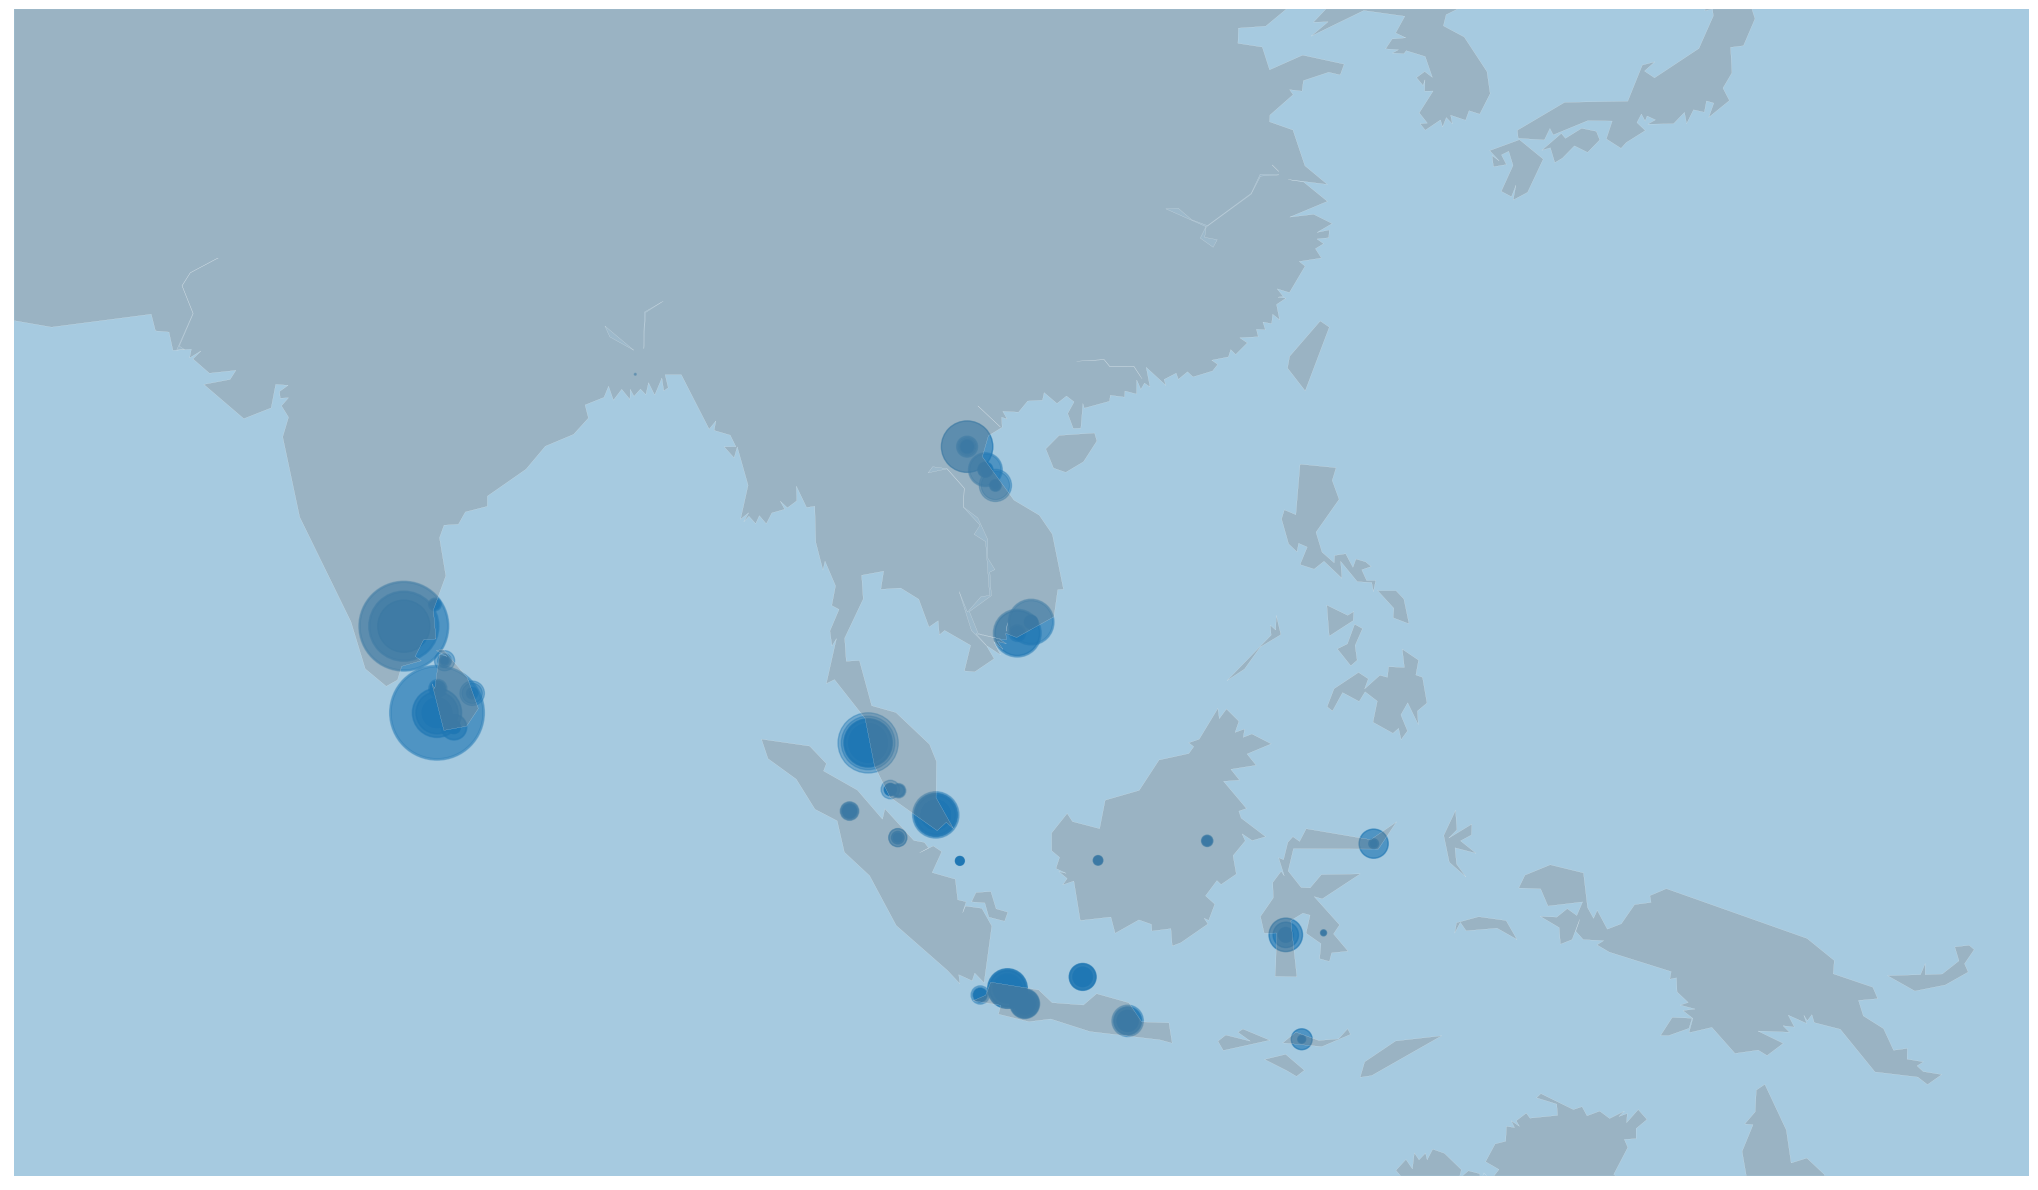

In [15]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=60, llcrnrlat=-15, urcrnrlon=155, urcrnrlat=40)  # SE Asia
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
m.scatter(df1['longitude'], df1['latitude'], s=df1['Impressions'], alpha=0.4, cmap="Set1")

plt.show()

C:\Users\Asma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


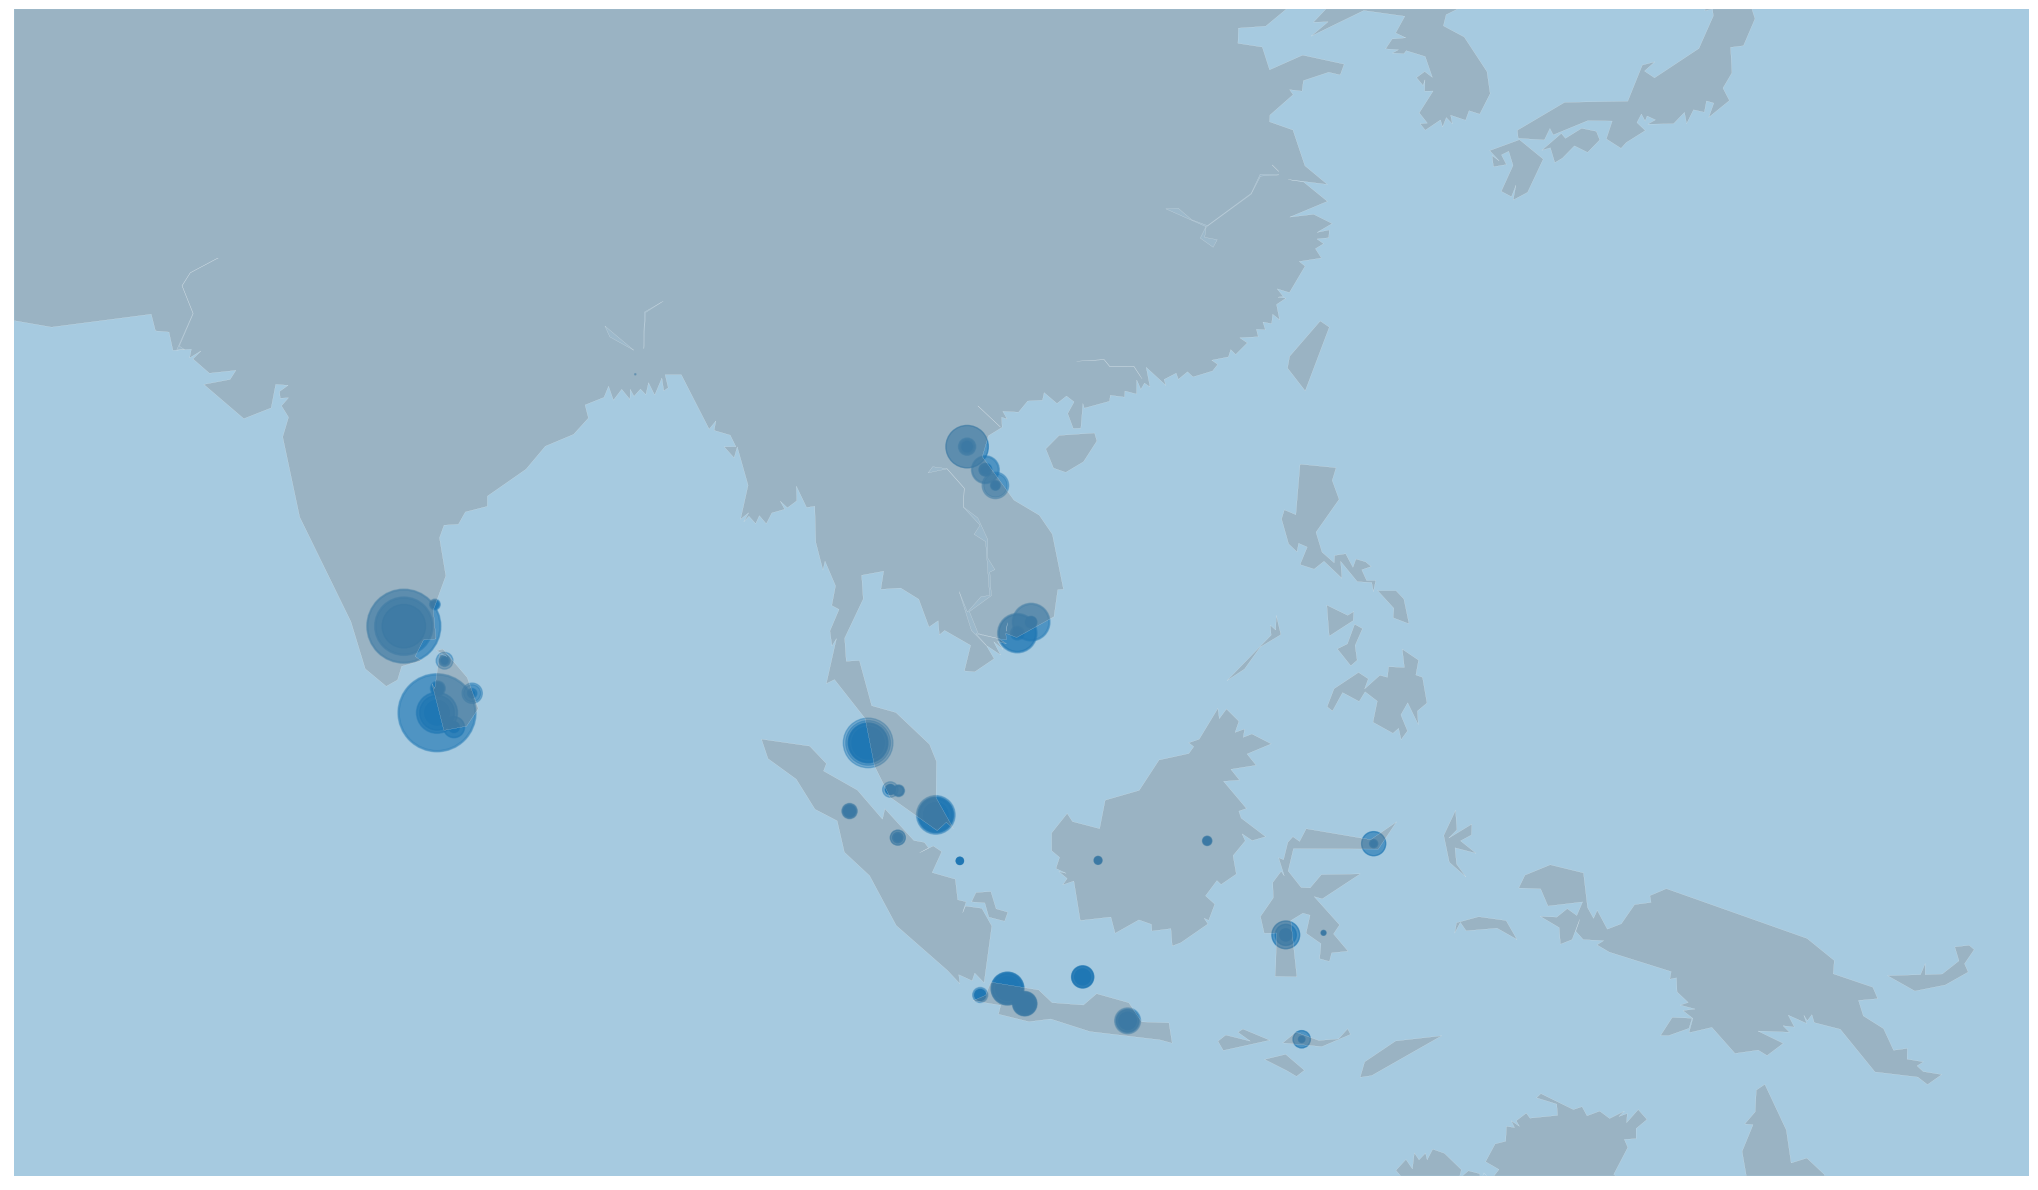

In [21]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

# Make the background map
r=Basemap(llcrnrlon=60, llcrnrlat=-15, urcrnrlon=155, urcrnrlat=40)  # SE Asia
r.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
r.fillcontinents(color='grey', alpha=0.3)
r.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
r.scatter(df1['longitude'], df1['latitude'], s=df1['Reach'], alpha=0.4, cmap="Set1")

plt.show()

C:\Users\Asma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


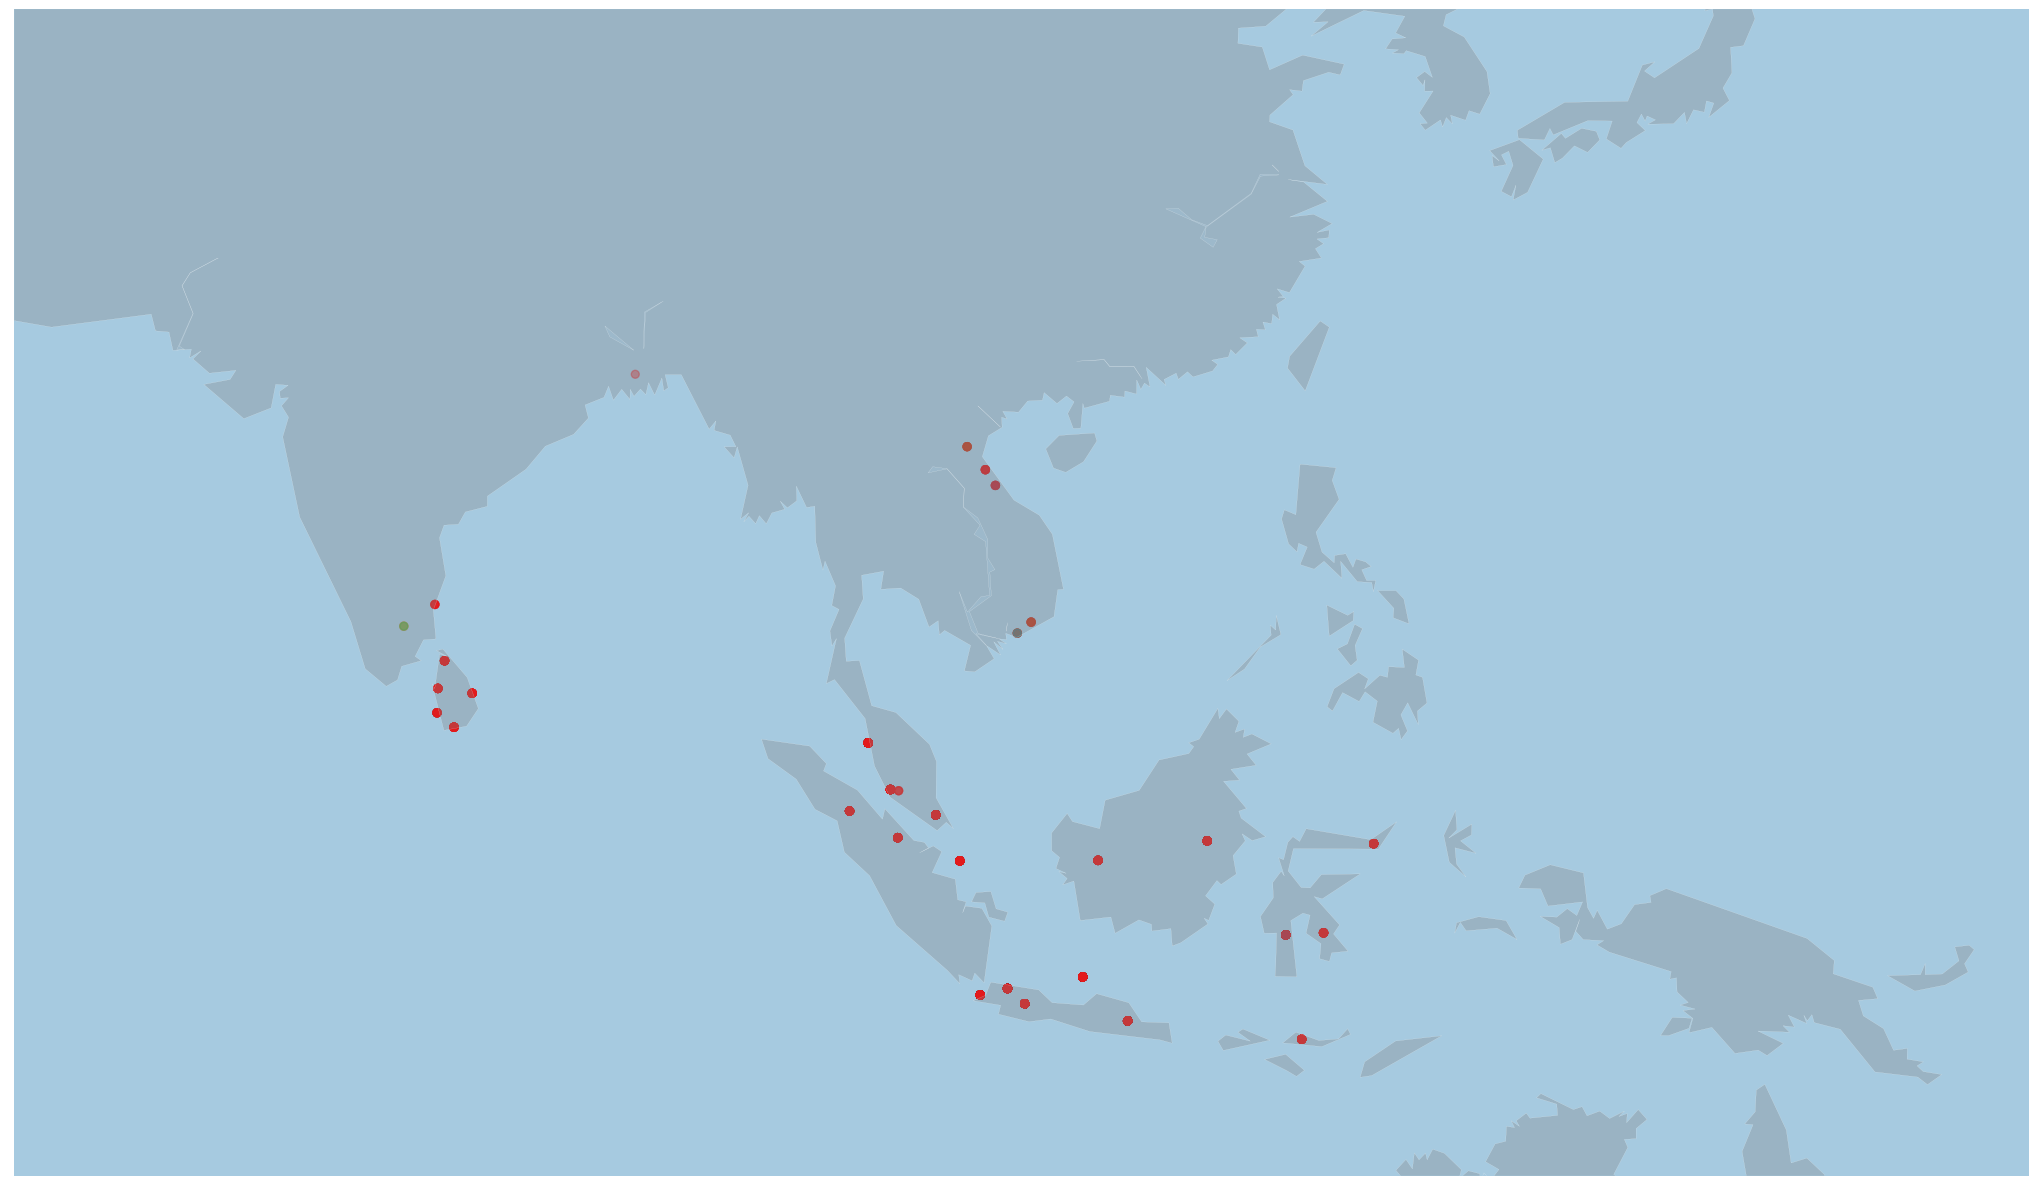

In [22]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

# Make the background map
c=Basemap(llcrnrlon=60, llcrnrlat=-15, urcrnrlon=155, urcrnrlat=40)  # SE Asia
c.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
c.fillcontinents(color='grey', alpha=0.3)
c.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
c.scatter(df1['longitude'], df1['latitude'], c=df1['Impressions'], alpha=0.4, cmap="Set1")

plt.show()